# Notebook 7 - Natural Language Processing (NLP)

CSI4106 Artificial Intelligence  
Fall 2020  
Prepared by Julian Templeton and Caroline Barrière

***INTRODUCTION***:  

Covid-19 has shifted our day-to-day lives and has impacted the world globally. Much of what is going on in the world is brought to us through the news, in the form of text.  

In this notebook, we will be performing Natural Language Processing techniques on a dataset of Covid-19 related news. We will be doing tokenization, lemmatization, Part-of-speech (POS) tagging, Named Entity Recognition, stopword removal, and more to sentences from news articles, and the entire dataset. You will be using the NLP library [spaCy](https://spacy.io/) to perform these NLP techniques. This library makes it simple to perform these complex operations for text in a specified language.    

This will allow you to explore the NLP Pipeline and analyze the contents of the text within the dataset. You will also be creating word clouds based on the modified text from the dataset. This will allow us to visualize the key words from the articles to better understand which content is most important in them.     

For this notebook you will need to install the following packages in addition to libraries previously used:     
1) [spaCy](https://spacy.io/usage): pip install -U spacy      
2) spaCy's English package (change the command according to your environment, ex: python vs py): py -m spacy download en          
3) [WordCloud](https://amueller.github.io/word_cloud/): pip install wordcloud      
4) MultiDict: pip install multidict     

**Note:** For some students who already have spaCy installed, an issue may occur when trying to work with the English package mentioned in (2). If this occurs, there is a commented line of code with an alternative way to run the same method. Only if you run into an issue where 'en' is not recognized, run the following pip command and switch the spacy.load() function in the code second code cell below to the commented call.    
Change the command according to your environment, ex: python vs py: py -m spacy download en_core_web_sm 

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time.  
Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, Sign the notebook (at the end of the notebook), and submit it.  

*The notebook will be marked on 25.  
Each **(TO DO)** has a number of points associated with it.*
***

In [1]:
# Before starting we will import every module that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import multidict as multidict
import re
import spacy
from spacy import displacy
from wordcloud import WordCloud

In [2]:
# The core spacy object that will be used for tokenization, lemmatization, POS Tagging, ...
# Note that this is specifically for the English language and requires the English package to be installed
# via pip to work as intended.

sp = spacy.load('en')

# If the above causes an error after installing the package described in (2), install the package described
# in the Note section within the introduction and run this line of code instead of the above.
#sp = spacy.load('en_core_web_sm')

**PART 1 - Sentence Analysis**  
  
In this part, we will use the modules from *spaCy* to perform the different steps of the NLP pipeline on sentences from the included file on Covid-19 related news articles from CBC news. The dataset is included with this submission, but details regarding it can be found [here](https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26?select=news.csv). The first thing that we will do is load the file into a pandas dataframe.  

In [3]:
# Read the dataset, show top ten rows
df = pd.read_csv("news.csv")
df.head(10)

Unnamed: 0                                            authors  \
0          0                                                 []   
1          1                                                 []   
2          2                             ['The Canadian Press']   
3          3                                                 []   
4          4                                                 []   
5          5  ['Senior Writer', 'Chris Arsenault Is A Senior...   
6          6                                       ['Cbc News']   
7          7                                       ['Cbc News']   
8          8  ['Senior Writer', "Adam Miller Is Senior Digit...   
9          9                                ['Thomson Reuters']   

                                               title      publish_date  \
0  'More vital now:' Gay-straight alliances go vi...   2020-05-03 1:30   
1  Scientists aim to 'see' invisible transmission...   2020-05-02 8:00   
2  Coronavirus: What's happening in Canada and ar...  2020-05-02 11:28   
3  B.C. announces 26 new coronavirus cases, new c...  2020-05-02 18:45   
4  B.C. announces 26 new coronavirus cases, new c...  2020-05-02 18:45   
5  Brazil has the most confirmed COVID-19 cases i...   2020-05-02 8:00   
6   The latest on the coronavirus outbreak for May 1  2020-05-01 20:43   
7  Coronavirus: What's happening in Canada and ar...  2020-05-01 11:51   
8  Did the WHO mishandle the global coronavirus p...   2020-04-30 8:00   
9  Armed people in Michigan's legislature protest...  2020-04-30 21:37   

                                         description  \
0  Lily Overacker and Laurell Pallot start each g...   
1  Some researchers aim to learn more about how t...   
2  Canada's chief public health officer struck an...   
3  B.C. provincial health officer Dr. Bonnie Henr...   
4  B.C. provincial health officer Dr. Bonnie Henr...   
5  From describing coronavirus as a "little flu,"...   
6  The latest on the coronavirus outbreak from CB...   
7  Nova Scotia announced Friday it is immediately...   
8  The World Health Organization has come under f...   
9  Hundreds of protesters, some armed, gathered a...   

                                                text  \
0  Lily Overacker and Laurell Pallot start each g...   
1  This is an excerpt from Second Opinion, a week...   
2  The latest:  The lives behind the numbers: Wha...   
3  B.C. provincial health officer Dr. Bonnie Henr...   
4  B.C. provincial health officer Dr. Bonnie Henr...   
5  With infection rates spiralling, some big city...   
6    Coronavirus Brief (CBC)  Canada is officiall...   
7  The latest:  The lives behind the numbers: Wha...   
8  The World Health Organization has come under f...   
9  Hundreds of protesters, some armed, gathered a...   

                                                 url  
0  https://www.cbc.ca/news/canada/calgary/gay-str...  
1  https://www.cbc.ca/news/technology/droplet-tra...  
2  https://www.cbc.ca/news/canada/coronavirus-cov...  
3  https://www.cbc.ca/news/canada/british-columbi...  
4  https://www.cbc.ca/news/canada/british-columbi...  
5  https://www.cbc.ca/news/world/brazil-has-the-m...  
6  https://www.cbc.ca/news/the-latest-on-the-coro...  
7  https://www.cbc.ca/news/canada/coronavirus-cov...  
8  https://www.cbc.ca/news/health/coronavirus-who...  
9  https://www.cbc.ca/news/world/protesters-michi...

From this dataset, we will start by extracting selecting five different sentences that we will be using throughout this section from an article. First, we will display the text of an article and will manually copy the sentences that that will be used for this section. Notice that there are many tags saved within the dataset, but we will not worry about those for now.

In [4]:
df["text"][1]

'This is an excerpt from\xa0Second Opinion, a\xa0weekly\xa0roundup of eclectic and under-the-radar health and medical science news emailed to subscribers every Saturday morning.\xa0If you haven\'t subscribed yet, you can do that by\xa0clicking here.  The coronavirus that causes COVID-19 spreads through droplets that we spew as we breathe, talk, cough and sneeze —\xa0so tiny that they\'re invisible to the naked eye.\xa0 That\'s why\xa0questions remain about the virus\'s transmission and what precautions need to be taken to curb its spread as governments begin to lift restrictions. Will it help if everyone wears a mask? Is keeping everyone two metres apart far enough? Some researchers aim to learn more about transmission by trying to make invisible sneezes, coughs and breaths more visible. Here\'s a closer look at that research and what it might reveal. How do scientists think COVID-19 is transmitted? According to the World Health Organization, the disease spreads primarily through tiny 

From this text, we will select one sentence that will be used by the examples provided within the notebook, *sentence_example*, and five sentences that you will be using to answer five questions within this section, *sentence1*, ... *sentence5*. Sentences 4 and 5 are the same due to that sentence being great for both of the questions.

In [5]:
# Sentence to be used for running examples
sentence_example = "Government guidelines in Canada recommend that people stay at least two metres away from others as part of physical distancing measures to curb the spread of COVID-19."
# Sentences to be used for future questions
sentence1 = "I think those are provocative and those are hypothesis- generating, but then they need to be tested in the field.\" Loeb is running such a field test himself — a randomized controlled trial of the use of medical versus N95 masks among health care workers to see if there is a difference in the transmission of COVID-19."
sentence2 = "The World Health Organization recommends that people wear masks if they are coughing and sneezing or if they are caring for someone who is sick."
sentence3 = "Will it help if everyone wears a mask?"
sentence4 = "Infection control guidelines do recommend extra personal protective equipment (including N-95 respirators) to protect against airborne transmission for healthcare workers performing procedures that generate high concentrations of aerosolized particles, such as intubations, on COVID-19 patients, McGeer said."
sentence5 = "Infection control guidelines do recommend extra personal protective equipment (including N-95 respirators) to protect against airborne transmission for healthcare workers performing procedures that generate high concentrations of aerosolized particles, such as intubations, on COVID-19 patients, McGeer said."

With the sentences that we will be using defined, we will now explore how spaCy can be applied on a sentence and go through examples of its usage. You will then be asked questions to solve on your own with your understanding of the NLP concepts, with the examples, and with links to relevant documentation.        

First, we will pass the example sentence into our spacy object *sp* to retrieve the tokenization, lemmatization, dependency values, Part-of-speech (POS) tags, and more from the sentence. As you will see, spaCy makes this process very easy.

In [6]:
# Call our spaCy object to retrieve the results of running the sentence through the NLP Pipeline
# Note that we can reuse the sp variable without redefining it.
sentence_example_content = sp(sentence_example)
for token in sentence_example_content:
    print("Text: " + str(token.text) + " Lemma: " + str(token.lemma_) + " POS: " + token.pos_ + 
          " Dependency: " + token.dep_)
# We will take a look at the dependency tree to view how the words relate to each other
displacy.render(sentence_example_content, style="dep")

Text: Government Lemma: government POS: NOUN Dependency: compound
Text: guidelines Lemma: guideline POS: NOUN Dependency: nsubj
Text: in Lemma: in POS: ADP Dependency: prep
Text: Canada Lemma: Canada POS: PROPN Dependency: pobj
Text: recommend Lemma: recommend POS: VERB Dependency: ROOT
Text: that Lemma: that POS: SCONJ Dependency: mark
Text: people Lemma: people POS: NOUN Dependency: nsubj
Text: stay Lemma: stay POS: VERB Dependency: ccomp
Text: at Lemma: at POS: ADV Dependency: advmod
Text: least Lemma: least POS: ADV Dependency: advmod
Text: two Lemma: two POS: NUM Dependency: nummod
Text: metres Lemma: metre POS: NOUN Dependency: npadvmod
Text: away Lemma: away POS: ADV Dependency: advmod
Text: from Lemma: from POS: ADP Dependency: prep
Text: others Lemma: other POS: NOUN Dependency: pobj
Text: as Lemma: as POS: SCONJ Dependency: prep
Text: part Lemma: part POS: NOUN Dependency: pobj
Text: of Lemma: of POS: ADP Dependency: prep
Text: physical Lemma: physical POS: ADJ Dependency: am

In the code above, we see that we are able to access the tags from the dependency tree for each token by calling *.dep_*. However, we can also directly access elements from the dependency tree (as seen in the code below). For more examples regarding how to navigate through the dependency trees, you can take a look at [some official spaCy examples](https://spacy.io/usage/linguistic-features#dependency-parse). However, below are details that are enough to know for this notebook.    

Looking at the dependency tree above, we see that the words have arrows to represent the relationships. Each of these have a dependency tab to explain the dependencies between tokens. For example, 'Government' is a compound of the noun 'guidelines'. Thus, 'Government guidelines' is a noun compound.    

In the code, after parsing text with spaCy into tokens, it is possible to access the words which a token has arrows connected to. This is exhibited in the code below.      

Note that when accessing a child node, you are able to access the properties in the same way that you would for a regular spaCy token (.pos_, ...).

In [7]:
# Display how to access the dependency children within a dependency tree
for token in sentence_example_content:
    print("Current token: " + token.text)
    print("All children of this token:", list(token.children))
    print("Left children of this token:", list(token.lefts))
    print("Right children of this token:", list(token.rights))
    print()

Current token: Government
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: guidelines
All children of this token: [Government, in]
Left children of this token: [Government]
Right children of this token: [in]

Current token: in
All children of this token: [Canada]
Left children of this token: []
Right children of this token: [Canada]

Current token: Canada
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: recommend
All children of this token: [guidelines, stay, .]
Left children of this token: [guidelines]
Right children of this token: [stay, .]

Current token: that
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: people
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: stay
All children of this token: [that, people, away, as]
Left children o

We can also use *sp* to retrieve the Named Entity Recognition (NER) tags of terms in a provided text. Below we use the results obtained above after calling spaCy to retrieve the NER tags for each token in the sentence that has been assigned an NER tag. We access this by calling *.label_* on an element from the iteration returned by calling *.ents* on the results returned by spaCy.

In [14]:
# Loop through all tokens that contain a NER tag and print the token along with the corresponding NER tag
for token in sentence_example_content.ents:
    print("\"" + token.text + "\" is a " + token.label_ )

"Canada" is a GPE
"at least two metres" is a QUANTITY


We'll explore Named Entity Recognition in the next Notebook, as this one focuses on linguistic analysis at the level of sentences and corpus.

**(TO DO) Q1 - 1 mark**  
For *sentence1*, use spaCy to run the sentence through the NLP Pipeline and determine how many tokens are in the sentence.

In [10]:
# TODO: How many tokens
sentence1_content = sp(sentence1)
len(sentence1_content)

61

**(TO DO) Q2 - 2 marks**  
For *sentence2*, display the dependency tree and determine what the subject is for the verb *recommends* (the entire name). You do not need to do this automatically, just print the value that you find by looking at the dependency tree.

In [13]:
# Display the dependency tree for sentence5
sentence2_content = sp(sentence2)
displacy.render(sentence2_content, style="dep")
# What is the subject of the verb 'recommends' in sentence5
print("The subject for the verb recommends is: The World Health Organization")

The subject for the verb recommends is: The World Health Organization


**(TO DO) Q3 - 2 marks**  
For *sentence3*, use spaCy to run the sentence through the NLP Pipeline and print only the words that are *VERB*s.

In [19]:
# TODO: Find the verbs
sentence3_content = sp(sentence3)
print("Verbs in sentence sentence 3:")
for token in sentence3_content:
    if token.pos_ == "VERB":
        print(token.text)

Verbs in sentence sentence 3:
Will
help
wears


**(TO DO) Q4**  
a) For *sentence4*, use spaCy to run the sentence through the NLP Pipeline and print only the words that are adjectives (*ADJ*s).     
b) For each adjective found in (a), find the nounds that the adjective modifies. To do this, you will need to go through the tags from the dependency tree to find the adjectives with the *amod* tag to find the following noun that it modifies.

**(TO DO) Q4 (a) - 1 mark**  
a) For *sentence4*, use spaCy to run the sentence through the NLP Pipeline and print only the words that are adjectives (*ADJ*s).     

In [38]:
# TODO: Find the adjectives
s4 = sp(sentence4)
print("Words that are ADJs in sentence4")
for token in s4:
    if token.pos_ == "ADJ":
        print(token.text)

Words that are ADJs in sentence4
extra
personal
protective
airborne
high
such
COVID-19


**(TO DO) Q4 (b) - 3 marks**  
b) For each applicable adjectives in the sentence, find the nouns that the adjective modifies. If several adjectives modify a single noun, each of those adjectives should be printed with those nouns (ex: 'extra -> equipment').            

To do this, you will need to go through the tags from the dependency tree to find the adjectives with the *amod* tag to find the following noun that it modifies. Note that not every adjective will have the *amod* dependency, but many will. 

*Hint*: Recall from the example at the beginning of this part that you are able to select a token and access each arrow leaving the token.   

Also note that you can approach this problem in many ways, so feel free to design the approach yourself (as long as it correctly answers the question).

In [22]:
# Display the dependency tree       
displacy.render(s4, style="dep")

In [40]:
# TODO: Print the nouns that an adjective modifies with the amod dependency label
# Go through the spaCy tokens, look for a specific POS tag, find the amod relations and print the relationship
for token in s4:
    if token.head.pos_ == "NOUN" and token.dep_ == "amod":
        print(token.text + " -> " + token.head.text)
        

extra -> equipment
personal -> equipment
protective -> equipment
airborne -> transmission
high -> concentrations
aerosolized -> particles


**(TO DO) Q5 - 3 marks**  
For *sentence5*, use spaCy to run the sentence through the NLP Pipeline and find all *noun compounds*. A noun compound consists of one or more words with a *compound* dependency value (that are also *NOUN*s) followed by a noun (*compound*, ..., *compound*, *non-compound NOUN*).      

To view the noun compounds, you can view the dependency tree of the sentence after running it through the NL pipeline via spaCy.    

You must put all of the compounds together in order to get marks. Print the obtained noun compounds.    

Note that you can approach this problem in many ways, so feel free to design the approach yourself (as long as it correctly answers the question).     

Ex: 'Infection control guidelines' is a noun compound.

Below we parsed the sentence, printed out the compounds, and displayed the dependency tree for you to look at before coding in the following cell.

In [45]:
# Apply spaCy to sentence3
s5 = sp(sentence5)

# Display all compounds within the sentence
for token in s5:
    if token.dep_ == "compound":
        print(token)

# Display the dependency tree
displacy.render(s5, style="dep")

Infection
control
N-95
healthcare


In [52]:
# TODO: Find, connect, and print all noun compounds
noun_compounds = []
for token in s5:
    noun_compound = ""
    
    # We want to find all combined compounds for a noun
    if token.pos_ == "NOUN":
        for child in s5:
            if child.head.text == token.text and child.dep_ == "compound":
                noun_compound += child.text + " "
        
    # If we received a noun compound, add it to the list
    if noun_compound != "":
        noun_compound += token.text
        noun_compounds.append(noun_compound)
    
# Print the noun compounds
print("List of noun compounds:")
for noun in noun_compounds:
    print(noun)

List of noun compounds:
Infection control guidelines
N-95 respirators
healthcare workers


**(TO DO) Q6 - 1 marks**  
Using the provided sentence, briefly explain the impact that length has on dependency tree of a sentence and on the parsing of the sentence (through a comment or print statement).

In [55]:
# TODO: Complete answer

sentence_parse = "In a surprisingly high turnout, millions of South Korean voters wore masks and moved slowly between lines of tape at polling stations on Wednesday to elect lawmakers in the shadow of the spreading coronavirus."
s_parse = sp(sentence_parse)
for token in s_parse:
    print("Text: " + str(token.text) + " Lemma: " + str(token.lemma_) + " POS: " + token.pos_ + 
          " Dependency: " + token.dep_)
displacy.render(s_parse, style="dep")
# TODO: What is the impact
print("The longer the sentence, the longer the pos tagging process will take and the larger the dependency tree will more likely tend to be (the size of the dependency tree may depend on the structure of the sentence)")

Text: In Lemma: in POS: ADP Dependency: prep
Text: a Lemma: a POS: DET Dependency: det
Text: surprisingly Lemma: surprisingly POS: ADV Dependency: advmod
Text: high Lemma: high POS: ADJ Dependency: amod
Text: turnout Lemma: turnout POS: NOUN Dependency: pobj
Text: , Lemma: , POS: PUNCT Dependency: punct
Text: millions Lemma: million POS: NOUN Dependency: nsubj
Text: of Lemma: of POS: ADP Dependency: prep
Text: South Lemma: south POS: ADJ Dependency: amod
Text: Korean Lemma: korean POS: ADJ Dependency: amod
Text: voters Lemma: voter POS: NOUN Dependency: pobj
Text: wore Lemma: wear POS: VERB Dependency: ROOT
Text: masks Lemma: mask POS: NOUN Dependency: dobj
Text: and Lemma: and POS: CCONJ Dependency: cc
Text: moved Lemma: move POS: VERB Dependency: conj
Text: slowly Lemma: slowly POS: ADV Dependency: advmod
Text: between Lemma: between POS: ADP Dependency: prep
Text: lines Lemma: line POS: NOUN Dependency: pobj
Text: of Lemma: of POS: ADP Dependency: prep
Text: tape Lemma: tape POS: NO

The longer the sentence, the longer the pos tagging process will take and the larger the dependency tree will more likely tend to be (the size of the dependency tree may depend on the structure of the sentence)


**PART 2 - Corpus Analysis**  

For the second section of this notebook, we will focus on analyzing the entire corpus by making word clouds based off of corpus content. This will help us identify the key words within the articles based on the criteria that we apply to the data with NLP techniques.   

For this section we will be using the WordCloud library which allows us to create the word clouds with text or by frequencies of the words within the text. The code for generating the word clouds based on the frequency comes from this [WordCloud example](https://amueller.github.io/word_cloud/auto_examples/frequency.html).

We will start with a simple example of creating a word cloud based on the titles of the documents in our corpus. Although we could use the descriptions of the aritcles or the actual test, this can take too long. Thus, we will be working with the titles which will allow word clouds to be generated in around a minute each.     

We will make a word cloud based on the frequencies of each term from the titles in our corpus, by calling the *getFrequencyDictForText* function below, and passing those frequencies to the word cloud via WordCloud's *generate_from_frequencies* function.

In [56]:
# Code from the example in: https://amueller.github.io/word_cloud/auto_examples/frequency.html
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}
    # making dict for counting frequencies
    for text in sentence.split(" "):
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [57]:
# This function comes from: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
# Define a function to plot a word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [61]:
# This can take about a minute
# Retrieve the frequencies from the titles in the dataframe
frequencies = getFrequencyDictForText(' '.join(df["title"]))
# Create a word cloud based on the frequencies from the titles in the dataframe
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
# Plot the word cloud
plot_cloud(word_cloud)

As you can see, we can easliy use the frequency of the terms from the titles to create a word cloud. These word clouds can be customized to be within image backgrounds, have custom colours, and more.    

The above word cloud contains some important terms, but many of the most frequent terms are not very important (or are symbols/numbers). These terms that appear very frequently in many different types of documents, but are not important, are called ***stopwords***. For example, the words *the*, *to*, *is*, *of*, ... are words that appear extremely frequently in text, but provide no meaningful information when analyzing a document. Often we want to remove these stopwords. For that reason, NLP libraries, such as spaCy, provide methods of detecting which words are stopwords. Below is an example of how spaCy can be used to determine if a word is a stopword (based on the sentence used in the first example from part 1).     

In [70]:
# Call our spaCy object to retrieve the results of running the sentence through the NLP Pipeline
# Note that we can reuse the sp variable without redefining it.
sentence_example_content = sp(sentence_example)
for token in sentence_example_content:
    print("Text: " + str(token.text) + " Is stopword: " + str(token.is_stop))

Text: Government Is stopword: False
Text: guidelines Is stopword: False
Text: in Is stopword: True
Text: Canada Is stopword: False
Text: recommend Is stopword: False
Text: that Is stopword: True
Text: people Is stopword: False
Text: stay Is stopword: False
Text: at Is stopword: True
Text: least Is stopword: True
Text: two Is stopword: True
Text: metres Is stopword: False
Text: away Is stopword: False
Text: from Is stopword: True
Text: others Is stopword: True
Text: as Is stopword: True
Text: part Is stopword: True
Text: of Is stopword: True
Text: physical Is stopword: False
Text: distancing Is stopword: False
Text: measures Is stopword: False
Text: to Is stopword: True
Text: curb Is stopword: False
Text: the Is stopword: True
Text: spread Is stopword: False
Text: of Is stopword: True
Text: COVID-19.1 Is stopword: False
Text: 1 Is stopword: False
Text: ; Is stopword: False
Text: ~ Is stopword: False


Thus, in the next few questions you will be exploring different ways of manipulating the title data before generating the frequencies to create the word clouds. This will result in different word clouds that allow us to view important terms from the text based on certain criteria.    

In the next few questions, be sure to recall the example from part 1 which exhibits how spaCy can be used to perform lemmatization and the example above which exhibits how spaCy can be used to perform stopword detection.

**(TO DO) Q7 - 2 marks**    
Make a word cloud based on the frequency of the content from the document titles, where the stopwords are removed (you must use spaCy to find the stopwords).     

*Ensure that you use random_state=1 when generating the word cloud.*

In [71]:
# TO DO
# Get the titles and run them through spaCy
titles_content = sp(' '.join(df["title"]))
# Create a string of with no stopwords
titles_with_no_stpw = "";
for token in titles_content:
    if token.is_stop == False:
        titles_with_no_stpw += token.text + " ";
# Get the frequencies
titles_frequencies = getFrequencyDictForText(titles_with_no_stpw)
# Create the word cloud (with random_state=1)
titles_word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(titles_frequencies)
# Plot the word cloud
plot_cloud(titles_word_cloud)

**(TO DO) Q8**    
1) Make a lemma cloud (a lemma is from the lemmatization of a token) based on the frequency of the content from the document titles with the stopwords removed, where the lemmas come from spaCy.    
2) Then, compare the resulting word cloud with the word cloud generated in Q7. What is the difference between the two?

*Ensure that you use random_state=1 when generating the word cloud.*

**(TO DO) Q8 (a) - 2 marks**    
Make a lemma cloud (a lemma is from the lemmatization of a token) based on the frequency of the content from the document titles with the stopwords removed, where the lemmas come from spaCy.    

*Ensure that you use random_state=1 when generating the word cloud.*

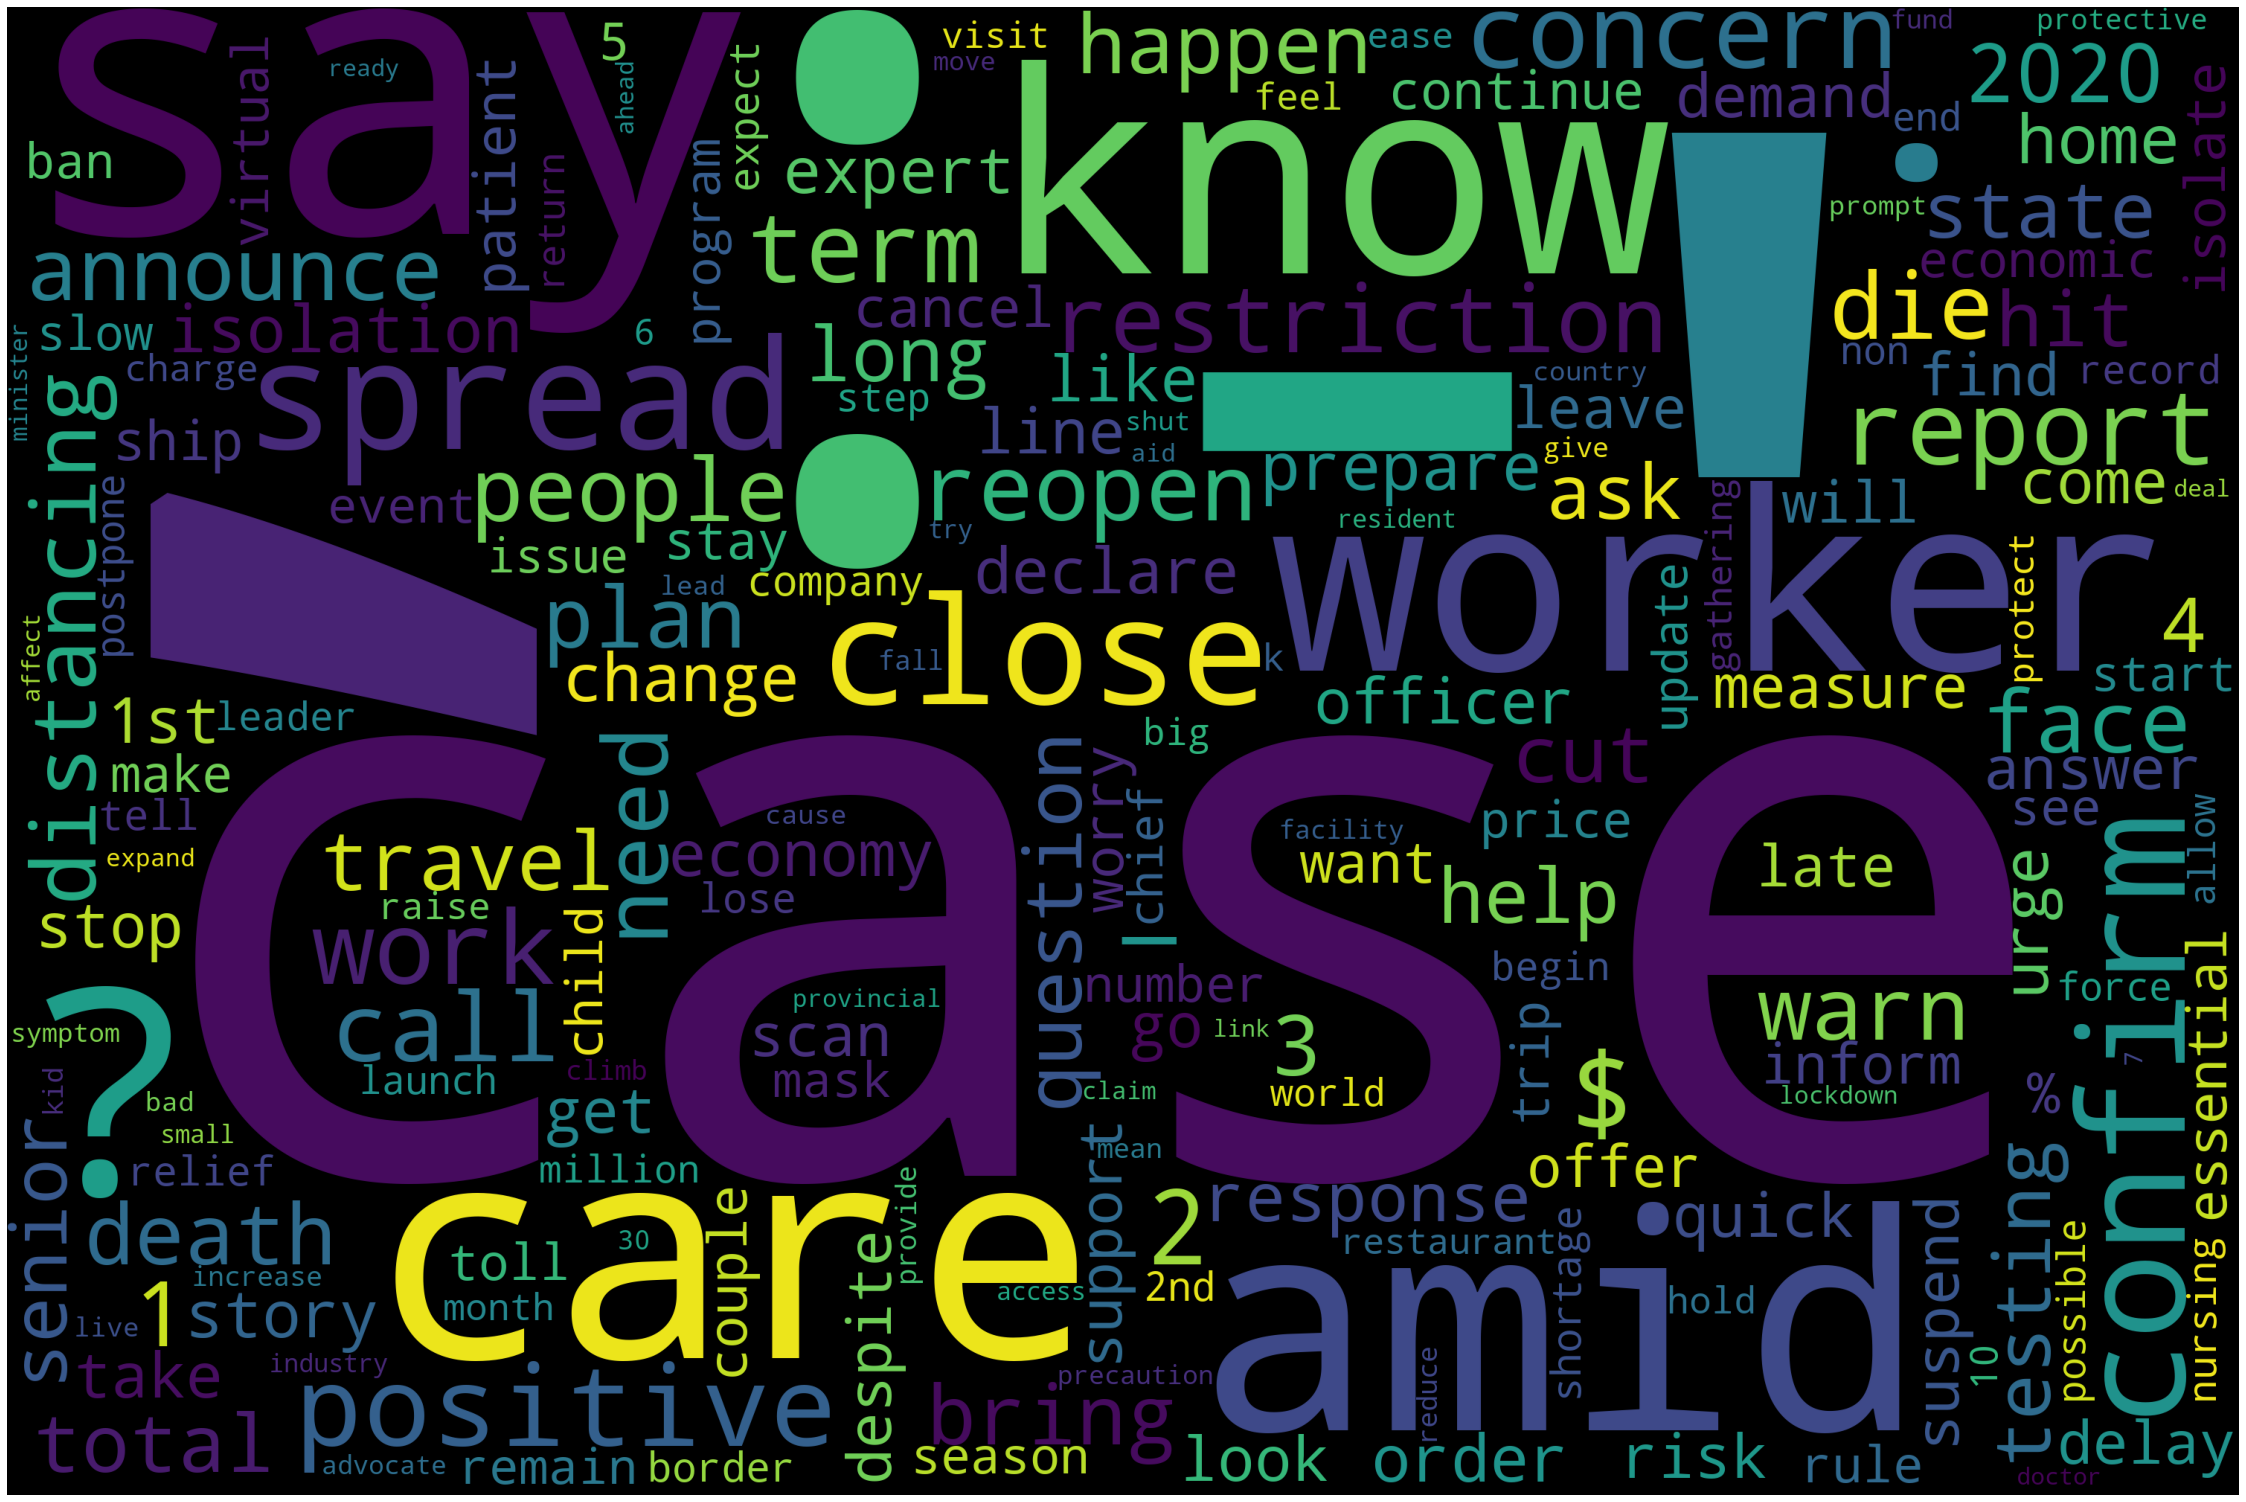

In [72]:
# TO DO
# Create a string of with no stopwords
titles_with_no_stpw_lemma = "";
for token in titles_content:
    if token.is_stop == False:
        titles_with_no_stpw_lemma += str(token.lemma_) + " ";
# Get the frequencies
titles_frequencies_lemma = getFrequencyDictForText(titles_with_no_stpw_lemma)
# Create the word cloud (with random_state=1)
titles_word_cloud_lemma = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(titles_frequencies_lemma)
# Plot the word cloud
plot_cloud(titles_word_cloud_lemma)

**(TO DO) Q8 (b) - 1 mark**    
Compare the resulting word cloud with the word cloud generated in Q7. What is the difference between the two (give a specific example)?

TODO (b) One example to illustrate the difference between the two is the change in the size of the words "case" and "care". In the first word cloud (Q7), "care" was larger than "case" but in the second word cloud (Q8), "case" is larger than "care". 

The fact that "cases" and "case" has been transformed to a single word ("case") through lemmatization made it more "frequent" than "care" and the fact that the word "care" is not numerically quantified (we say "much care" and not "many cares") did not have much impact on the frequency of the "care" after lemmatization. 

Therefore, after lemmatization, some words would become more "frequent" than others. 

**(TO DO) Q9 - 3 marks**    
Build a word cloud based with the content of the titles of the documents where only the *Adjectives* are used AND where all of the stopwords are removed AND where the lemmas are added (rather than the text).    

*Ensure that you use random_state=1 when generating the word cloud.*

In [73]:
# TO DO (adjectives only, remove stopwords, and add only lemmas)
# Create a string of with no stopwords
titles_lemma_adj_no_stpw = "";
for token in titles_content:
    if token.is_stop == False and token.pos_ == "ADJ":
        titles_lemma_adj_no_stpw += str(token.lemma_) + " ";
# Get the frequencies
titles_frequencies_lemma_adj_no_stpw = getFrequencyDictForText(titles_lemma_adj_no_stpw)
# Create the word cloud (with random_state=1)
titles_word_cloud_lemma_adj = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(titles_frequencies_lemma_adj_no_stpw)
# Plot the word cloud
plot_cloud(titles_word_cloud_lemma_adj)

**(TO DO) Q10 - 2 marks**    
Based on your own choice, build a word cloud based with the content of the titles of the documents where only the *Verbs* or the *Nouns* are used (you select one of these to work with) AND where all of the stopwords are removed AND where the lemmas are added (rather than the text).    

*Ensure that you use random_state=1 when generating the word cloud.*

In [76]:
# TO DO (select only one of the POS types above, remove stopwords, and add only lemmas)
# Create a string of with no stopwords
titles_verbs = "";
for token in titles_content:
    if token.is_stop == False and token.pos_ == "VERB":
        titles_verbs += str(token.lemma_) + " ";
# Get the frequencies
titles_frequencies_verbs = getFrequencyDictForText(titles_verbs)
# Create the word cloud (with random_state=1)
titles_word_cloud_verbs = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(titles_frequencies_verbs)
# Plot the word cloud
plot_cloud(titles_word_cloud_verbs)

Now that all of the word clouds have been created, you will answer some questions to analyze how the NLP techniques that have been perfermed impacted the generated word clouds.

**(TO DO) Q11**    
Answer the following two questions:               
1) How does removing the stopwords in Q7 affect the word cloud?     
2) Out of the word clouds that you have created, which word cloud do you believe provided the most relevant terms related to Covid-19 and why?

**(TO DO) Q11 (a) - 1 mark**    
How does removing the stopwords in Q7 affect the word cloud?  

Remove the stopwords helped making words with actual meaning stand out in the cloud. Stopwords, before removing them, were some of the most frequent words and therefore were more visible in the cloud although they did not provide any additional information about the text content.

**(TO DO) Q11 (b) - 1 mark**    
Out of the word clouds that you have created, which word cloud do you believe provided the most relevant terms related to Covid-19 and why?

In my opinion, the second to last was the most relevant as the words "new", "pandemic", "canadian" were some of the most visible ones although "pandemic" is not an adjective. Based on the background information I have about the text content, they give very meaningful keywords about the text.   

***SIGNATURE:***
My name is Ange Michaella Niyonkuru.
My student number is 8962161.
I certify being the author of this assignment.